<a href="https://colab.research.google.com/github/Yu-Hayung/Python-Machine-Learning-and-Deep-Learning/blob/main/9_%ED%85%8D%EC%8A%A4%ED%8A%B8%EB%A5%BC_%EC%9C%84%ED%95%9C_%EC%9D%B8%EA%B3%B5_%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 텍스트를 위한 인공 신경망 

## 순차 데이터와 순환 신경망 

## 순환 신경망으로 IMDB 리뷰 분류 하기 

In [1]:
from tensorflow.keras.datasets import imdb

(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [2]:
print(train_input.shape, test_input.shape) 

# 2차원 배열에 담기 보다는 리뷰 마다 별도의 파이썬 리스트로 담아야 메모리를 효율적으로 사용할 수 있다. 

(25000,) (25000,)


In [3]:
print(len(train_input[0]))

218


In [4]:
print(len(train_input[1]))

189


In [5]:
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [6]:
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [7]:
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

In [8]:
import numpy as np
lengths = np.array([len(x) for x in train_input])

In [9]:
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


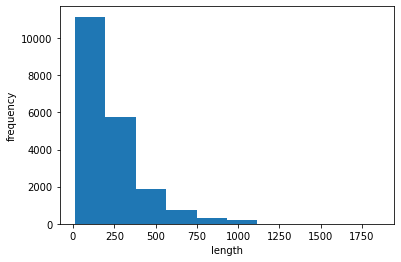

In [10]:
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [11]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)

In [13]:
print(train_seq.shape)

(20000, 100)


In [17]:
print(train_seq[0])

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


In [18]:
print(train_input[0][-10:])

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


In [20]:
print(train_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [21]:
val_seq = pad_sequences(val_input, maxlen=100)

## 순환 신경망 만들기 

In [22]:
from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape=(100,500)))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [23]:
train_oh = keras.utils.to_categorical(train_seq)
print(train_oh.shape)

(20000, 100, 500)


In [25]:
print(train_oh[0][0][:12])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [26]:
print(np.sum(train_oh[0][0]))

1.0


In [29]:
val_oh = keras.utils.to_categorical(val_seq)

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 8)                 4072      
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


## 순환 신경망 훈련하기 

In [30]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

In [31]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

In [32]:
history = model.fit(train_oh, train_target, epochs=100, batch_size=64,
                    validation_data=(val_oh, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 14s 41ms/step - loss: 0.6973 - accuracy: 0.5031 - val_loss: 0.6972 - val_accuracy: 0.5040
Epoch 2/100
313/313 [==============================] - 13s 40ms/step - loss: 0.6944 - accuracy: 0.5104 - val_loss: 0.6956 - val_accuracy: 0.5044
Epoch 3/100
313/313 [==============================] - 13s 40ms/step - loss: 0.6922 - accuracy: 0.5200 - val_loss: 0.6943 - val_accuracy: 0.5122
Epoch 4/100
313/313 [==============================] - 13s 40ms/step - loss: 0.6902 - accuracy: 0.5303 - val_loss: 0.6930 - val_accuracy: 0.5186
Epoch 5/100
313/313 [==============================] - 13s 40ms/step - loss: 0.6883 - accuracy: 0.5418 - val_loss: 0.6917 - val_accuracy: 0.5190
Epoch 6/100
313/313 [==============================] - 12s 40ms/step - loss: 0.6861 - accuracy: 0.5526 - val_loss: 0.6900 - val_accuracy: 0.5286
Epoch 7/100
313/313 [==============================] - 12s 39ms/step - loss: 0.6834 - accuracy: 0.5633 - val_loss: 0.6873 - val_ac

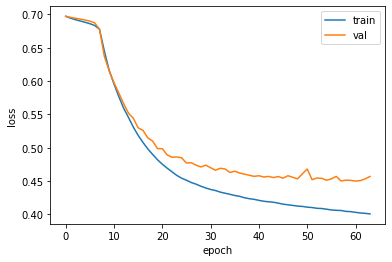

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

## 단어 임베딩을 사용하기 

In [34]:
model2 = keras.Sequential()

model2.add(keras.layers.Embedding(500,16,input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation = 'sigmoid'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           8000      
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 8)                 200       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


In [36]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)

In [39]:
model2.compile(optimizer=rmsprop, loss='binary_crossentropy',
               metrics = ['accuracy'])

In [40]:
checkpint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

In [42]:
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 7s 20ms/step - loss: 0.6659 - accuracy: 0.6102 - val_loss: 0.6440 - val_accuracy: 0.6620
Epoch 2/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6262 - accuracy: 0.6906 - val_loss: 0.6167 - val_accuracy: 0.7042
Epoch 3/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6019 - accuracy: 0.7268 - val_loss: 0.5988 - val_accuracy: 0.7298
Epoch 4/100
313/313 [==============================] - 6s 20ms/step - loss: 0.5833 - accuracy: 0.7459 - val_loss: 0.5803 - val_accuracy: 0.7500
Epoch 5/100
313/313 [==============================] - 6s 20ms/step - loss: 0.5664 - accuracy: 0.7614 - val_loss: 0.5672 - val_accuracy: 0.7512
Epoch 6/100
313/313 [==============================] - 6s 20ms/step - loss: 0.5523 - accuracy: 0.7702 - val_loss: 0.5572 - val_accuracy: 0.7650
Epoch 7/100
313/313 [==============================] - 6s 20ms/step - loss: 0.5394 - accuracy: 0.7780 - val_loss: 0.5456 - val_accuracy:

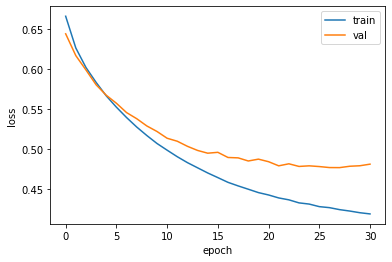

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

# LSTM 과 GRU 셀 

## LSTM 신경망 훈련하기 

In [44]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

In [47]:
(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=500)

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [48]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [51]:
from tensorflow import keras

model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 8)                 4072      
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
_________________________________________________________________
embedding_1 (Embedding)      (None, 1, 16)             8000      
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 800       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
_________________________________________________________________
embedding_2 (Embedding)      (None, 1, 16)             8000      
_________________________________________________________________
lstm_1 (LSTM)                (None, 8)                 8

## 2개의 층을 연결하기 

In [52]:
model3 = keras.Sequential()

model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 8)            800       
_________________________________________________________________
lstm_3 (LSTM)                (None, 8)                 544       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [53]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy',
               metrics=['accuracy'])

In [54]:
checkpint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

In [55]:
history = model3.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 27s 76ms/step - loss: 0.6928 - accuracy: 0.5289 - val_loss: 0.6923 - val_accuracy: 0.5570
Epoch 2/100
313/313 [==============================] - 23s 72ms/step - loss: 0.6908 - accuracy: 0.5803 - val_loss: 0.6883 - val_accuracy: 0.6168
Epoch 3/100
313/313 [==============================] - 23s 73ms/step - loss: 0.6790 - accuracy: 0.6226 - val_loss: 0.6642 - val_accuracy: 0.6128
Epoch 4/100
313/313 [==============================] - 23s 73ms/step - loss: 0.6269 - accuracy: 0.6840 - val_loss: 0.5913 - val_accuracy: 0.7212
Epoch 5/100
313/313 [==============================] - 23s 72ms/step - loss: 0.5708 - accuracy: 0.7311 - val_loss: 0.5488 - val_accuracy: 0.7446
Epoch 6/100
313/313 [==============================] - 23s 72ms/step - loss: 0.5405 - accuracy: 0.7486 - val_loss: 0.5231 - val_accuracy: 0.7606
Epoch 7/100
313/313 [==============================] - 23s 73ms/step - loss: 0.5152 - accuracy: 0.7652 - val_loss: 0.5004 - val_ac

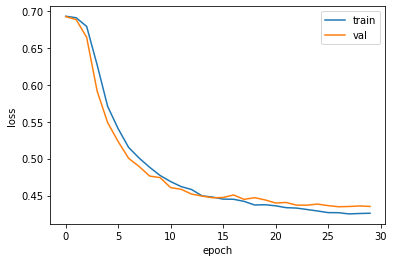

In [56]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

## GRU 신경망 훈련하기 

In [57]:
model4 = keras.Sequential()

model4.add(keras.layers.Embedding(500, 15, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 15)           7500      
_________________________________________________________________
gru (GRU)                    (None, 8)                 600       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 8,109
Trainable params: 8,109
Non-trainable params: 0
_________________________________________________________________


In [58]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy',
               metrics = ['accuracy'])

In [59]:
checkpint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

In [60]:
history = model4.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 15s 42ms/step - loss: 0.6916 - accuracy: 0.5356 - val_loss: 0.6905 - val_accuracy: 0.5802
Epoch 2/100
313/313 [==============================] - 13s 40ms/step - loss: 0.6883 - accuracy: 0.5946 - val_loss: 0.6867 - val_accuracy: 0.5950
Epoch 3/100
313/313 [==============================] - 13s 40ms/step - loss: 0.6829 - accuracy: 0.6180 - val_loss: 0.6806 - val_accuracy: 0.6080
Epoch 4/100
313/313 [==============================] - 13s 40ms/step - loss: 0.6740 - accuracy: 0.6341 - val_loss: 0.6705 - val_accuracy: 0.6208
Epoch 5/100
313/313 [==============================] - 12s 40ms/step - loss: 0.6594 - accuracy: 0.6450 - val_loss: 0.6526 - val_accuracy: 0.6452
Epoch 6/100
313/313 [==============================] - 12s 40ms/step - loss: 0.6338 - accuracy: 0.6684 - val_loss: 0.6209 - val_accuracy: 0.6744
Epoch 7/100
313/313 [==============================] - 12s 40ms/step - loss: 0.5807 - accuracy: 0.7078 - val_loss: 0.5502 - val_ac

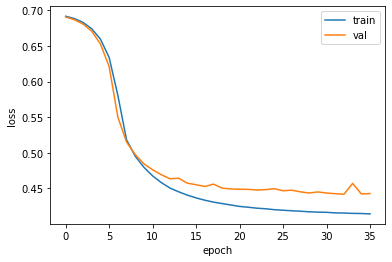

In [61]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

## 마무리 

In [62]:
test_seq = pad_sequences(test_input, maxlen=100)

rnn_model = keras.models.load_model('best-2rnn-model.h5')

rnn_model.evaluate(test_seq, test_target)

782/782 [==============================] - 10s 12ms/step - loss: 0.4296 - accuracy: 0.7982


[0.4296112060546875, 0.7982400059700012]